<a href="https://colab.research.google.com/github/mekjr1/google-colabs/blob/main/tutorial_MICAI2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
DATA_PATH='/content/drive/My Drive/MICAI 2021 Tutorial/'

# Loading lexical resources

**TextBlob**. [https://textblob.readthedocs.io/en/dev/](https://)

In [4]:
from textblob import TextBlob
def sentimentAnalysis_textBlob(dataset):
  polarity = []
  subjectivity = []
  for t in dataset:
    resultTB = TextBlob(t)
    #print (resultTB)
    polarityTB = resultTB.sentiment
    polarity.append(polarityTB.polarity)
    subjectivity.append(polarityTB.subjectivity)
  return polarity, subjectivity

**NRC - EmoLex** [https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm](https://)

In [5]:
pip install NRCLex

     |████████████████████████████████| 396 kB 5.3 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43328 sha256=94f4f9b35fe69c78c229fbebcdcb8d00e195e4521b9ad5ca144d5a70be37faf2
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
def make_radar_chart(name, stats, attribute_labels):
    labels = np.array(attribute_labels)
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title(name)
    return plt.show()

In [8]:
from nrclex import NRCLex
def emolex_analysis(text, label):
  emotionsDictionary = {}
  emotionsDictionary['joy'] = 0
  emotionsDictionary['anticipation'] = 0
  emotionsDictionary['sadness'] = 0
  emotionsDictionary['trust'] = 0
  emotionsDictionary['fear'] = 0
  emotionsDictionary['surprise'] = 0
  emotionsDictionary['disgust'] = 0
  emotionsDictionary['anger'] = 0
  emotionsDictionary['positive'] = 0
  emotionsDictionary['negative'] = 0
  for i in range(len(text)): 
    emotion = NRCLex(text[i]) 
    for w in emotion.raw_emotion_scores.keys():
      emotionsDictionary[w] = emotionsDictionary[w] + emotion.raw_emotion_scores[w]

  labels = []
  values = []
  for k in emotionsDictionary:
    values.append(emotionsDictionary[k])
    labels.append(k)
  make_radar_chart(label, values, labels)

**AFINN**

In [9]:
pip install afinn

     |████████████████████████████████| 52 kB 973 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=dc50152468dbe5d767cd212311a89f6d8c0673453118d4f5e631cc99f243d3e7
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [10]:
from afinn import Afinn

def afinn_vector(text, label):
  afn = Afinn()
  positive = 0
  negative = 0
  neutral = 0
  scores = [afn.score(t) for t in text]
  #print (scores)
  
  sentimentLabel = []
  for s in scores:
    if s < 0:
      negative = negative + 1
    elif s == 0:
      neutral = neutral + 1
    else:
      positive = positive + 1

  fig1, ax1 = plt.subplots()
  ax1.pie([negative,neutral,positive], labels=["negative", "neutral", "positive"], autopct='%1.1f%%', shadow=True, startangle=90, colors = ["red", "yellow", "green"])
  ax1.axis('equal')  
  ax1.set_title(label)
  plt.show()

# ANEW 


In [11]:
#anew
def anew_vector(text):
  anew = pd.read_csv(DATA_PATH + 'anew.csv', sep=',', header=0)
  #print (anew.head)
  pl = 0
  pleasure = [] 
  ar = 0
  arousal = []
  dm = 0
  dominance = []
  for t in text:
    for w in t.split(" "):
      #print (w)
      p = anew[anew.term == w].pleasure.values
      a = anew[anew.term == w].arousal.values
      d = anew[anew.term == w].dominance.values
      if p.shape[0] > 0:
        pl = pl + p[0]
        ar = ar + a[0]
        dm = dm + d[0]
        
    pl = pl/len(t.split(" "))
    ar = ar/len(t.split(" "))
    dm = dm/len(t.split(" "))
    pleasure.append(pl)
    arousal.append(ar)
    dominance.append(dm)
  return pleasure, arousal, dominance

# **Vader** [https://pypi.org/project/vaderSentiment/](https://)

In [12]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [13]:
def vader_analizer(dataset):
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
  sid_obj = SentimentIntensityAnalyzer()

  positive = []
  negative = []
  neutral = [] 
  for d in dataset:
     sentiment_dict = sid_obj.polarity_scores(d)
     positive.append(sentiment_dict['pos']*100)
     negative.append(sentiment_dict['neg']*100)
     neutral.append(sentiment_dict['neu']*100)
  data = [positive, neutral, negative]
  fig = plt.figure(figsize =(5, 4))
  ax = fig.add_axes([0, 0, 1, 1])
  bp = ax.boxplot(data, labels=['Positive','Neutral','Negative'])

# Loading dataset

**Amazon Reviews**  [https://www.kaggle.com/bittlingmayer/amazonreviews](https://)

In [19]:
text = open(DATA_PATH + 'dataset_sa.txt', 'rb').read().decode(encoding='utf-8')
text = text.split("\n")
instances = []
classes = []
for t in text:
  instances.append(t[2:].lower())
  classes.append(t[0])

for i in range(10):
  print (instances[i])

stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^
the best soundtrack ever to anything.: i'm reading a lot of reviews saying that this is the best 'game soundtrack' and i figured that i'd write a review to disagree a bit. this in my opinino is yasunori mitsuda's ultimate masterpiece. the music is timeless and i'm been listening to it for years now and its beauty simply refuses to fade.the price tag on this is pretty staggering i must say, but if you are going to buy any cd for this much money, this is the only one that i feel would be worth every penny.
amazing!: this soundtrack is my favorite music of all time, han

**Irony Detection** [https://www.kaggle.com/nikhiljohnk/tweets-with-sarcasm-and-irony](https://)

In [27]:
text = open(DATA_PATH + 'irony_dataset.txt', 'rb').read().decode(encoding='utf-8')
text = text.split("\n")
instances = []
classes = []
for t in text:
  instances.append(t[2:].lower())
  classes.append(t[0])

for i in range(10):
  print (instances[i])

"#style #news  car styling is the pinnacle in the world of design and the epicenter of this creative co... http://t.co/vlvcvxbae9
"#teamablazeofglory #peace
"#trump may be rich but most of his assets are stuck up in stuck up investments.he need liquid cash to finance his campaign.
"#truth
"'divergent' by @rickcelis 
"( ohhh no!  ) ðÿ˜‚ #whodidthis â˜† #bruh
"(39pict) funny pictures of the day 109 
"- #late #night #beat #session
"- from ""pick up at union station.""
".


Class distribution:  Counter({'0': 3759, '1': 3247})
Training:  Counter({'0': 2622, '1': 2282})
Test:  Counter({'0': 1137, '1': 965})


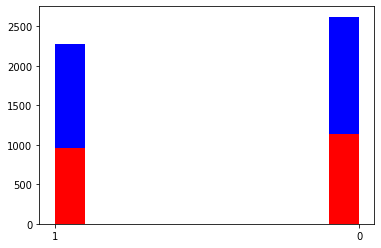

In [28]:
X_train, X_test, y_train, y_test = train_test_split(instances, classes, test_size=0.3)

from collections import Counter
totalInstances = Counter(classes)
print("Class distribution: ", totalInstances)
trainLabels = Counter(y_train)
print("Training: ", trainLabels)
testLabels = Counter(y_test)
print("Test: ", testLabels)

plt.hist(y_train, color = "blue") 
plt.hist(y_test, color = "red")
plt.show()

# Analyzing dataset

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


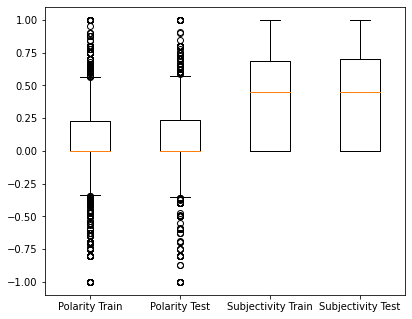

In [30]:
#TextBlob
polarity_train, subjectivity_train = sentimentAnalysis_textBlob(X_train)
polarity_test, subjectivity_test = sentimentAnalysis_textBlob(X_test)

data = [polarity_train, polarity_test, subjectivity_train, subjectivity_test]
fig = plt.figure(figsize =(5, 4))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, labels=['Polarity Train','Polarity Test','Subjectivity Train','Subjectivity Test'])

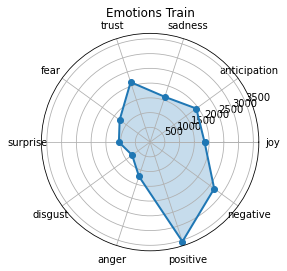

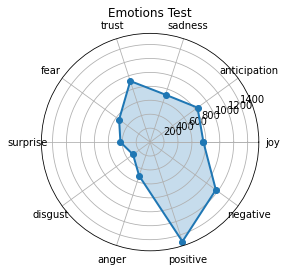

In [31]:
#NRC EmoLex
emolex_analysis(X_train, "Emotions Train")
emolex_analysis(X_test, "Emotions Test")

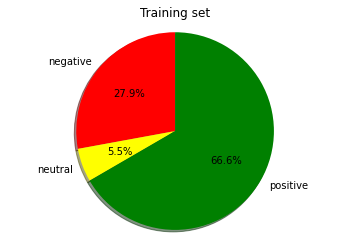

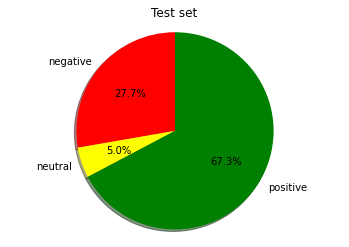

In [23]:
#AFINN
afinn_vector(X_train, "Training set")
afinn_vector(X_test, "Test set")

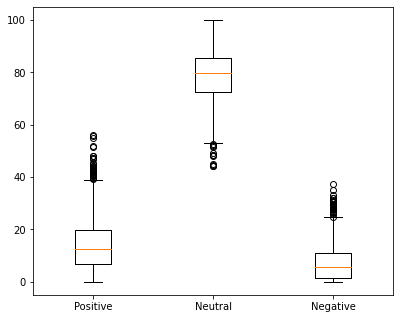

In [24]:
vader_analizer(X_test)

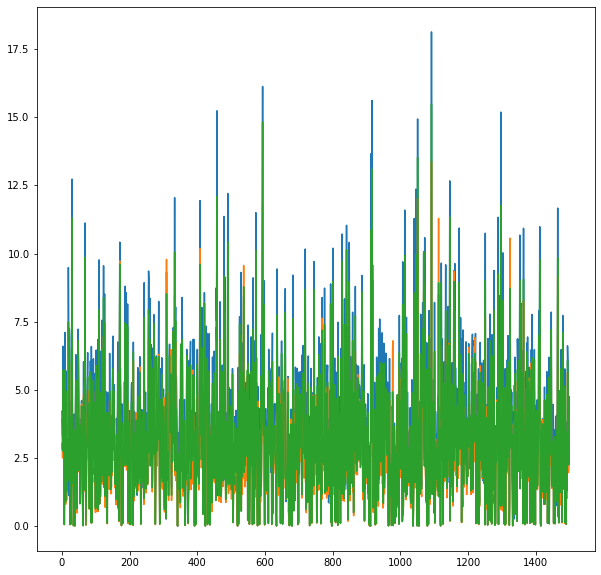

In [26]:
pleasure, arousal, dominance = anew_vector(X_test)
fig = plt.figure(figsize=(10,10))
plt.plot(pleasure)
plt.plot(arousal)
plt.plot(dominance)
plt.show()